In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('mode.use_inf_as_na', True)  # or False

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\adity\AppData\Local\Temp\ipykernel_22084\2966153729.py:7: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)  # or False


In [7]:
!pip install tensorflow

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv('C:/Users/adity/Downloads/archive/Sleep_health_and_lifestyle_dataset.csv')

In [10]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
df.fillna(value="no disorder", inplace=True)

In [12]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,no disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,no disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,no disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [13]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [14]:
df.info

<bound method DataFrame.info of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6  

In [15]:
drop_cols=['Person ID','Quality of Sleep']
df2=df.drop(drop_cols,axis=1)


In [16]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,no disorder
1,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder
2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder
3,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea


#### converting blood pressure into 2 value-systolic diastolic for and float values 

In [17]:
df2[['systolic_pressure', 'diastolic_pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)


In [18]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure
0,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,no disorder,126.0,83.0
1,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0
2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [19]:
df2['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
bmi_categories = ['Overweight', 'Normal', 'Obese', 'Normal Weight']
ordinal_encoder = OrdinalEncoder(categories=[bmi_categories])
df2['BMI_category_encoded'] = ordinal_encoder.fit_transform(df[['BMI Category']])

In [21]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,no disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,no disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,no disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [22]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure,BMI_category_encoded
0,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,no disorder,126.0,83.0,0.0
1,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0,1.0
2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0,1.0
3,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0,2.0
4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0,2.0


### ordinal encoding of bmi categories 

In [23]:
print(df2['BMI Category'].unique())
print(df2['BMI_category_encoded'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']
[0. 1. 2. 3.]


In [24]:
bmi_legend={}
keys=list(df2['BMI Category'].unique())
vals=list(df2['BMI_category_encoded'].unique())
for k in range(len(keys)):
               bmi_legend[keys[k]]=vals[k]

print(bmi_legend)

{'Overweight': 0.0, 'Normal': 1.0, 'Obese': 2.0, 'Normal Weight': 3.0}


**{'Overweight': 0.0, 'Normal': 1.0, 'Obese': 2.0, 'Normal Weight': 3.0}**

In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'Gender', 'Occupation', 'Sleep Disorder' are the names of your categorical columns
categorical_columns = ['Gender', 'Occupation', 'Sleep Disorder']
label_encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df2[column + '_encoded'] = label_encoder.fit_transform(df2[column])
    label_encoders[column] = label_encoder

# Now label_encoders dictionary contains the fitted LabelEncoder objects for each categorical column


In [26]:
df2.shape

(374, 17)

In [27]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure,BMI_category_encoded,Gender_encoded,Occupation_encoded,Sleep Disorder_encoded
0,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,no disorder,126.0,83.0,0.0,1,9,2
1,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0,1.0,1,1,2
2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,no disorder,125.0,80.0,1.0,1,1,2
3,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0,2.0,1,6,1
4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0,2.0,1,6,1


In [28]:
df2.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'systolic_pressure', 'diastolic_pressure', 'BMI_category_encoded',
       'Gender_encoded', 'Occupation_encoded', 'Sleep Disorder_encoded'],
      dtype='object')

In [29]:
# Assuming df is your DataFrame and selected_columns is a list of column names you want to include in the subset
selected_columns = ['Gender_encoded', 'Age', 'Occupation_encoded','Sleep Duration','Physical Activity Level','Stress Level','BMI_category_encoded','Heart Rate','Daily Steps','systolic_pressure','diastolic_pressure','Sleep Disorder_encoded']
encoded_df = df2[selected_columns].copy()


### encoded datframe

In [30]:
encoded_df.head()

,Gender_encoded,Age,Occupation_encoded,Sleep Duration,Physical Activity Level,Stress Level,BMI_category_encoded,Heart Rate,Daily Steps,systolic_pressure,diastolic_pressure,Sleep Disorder_encoded
0,1,27,9,6.1,42,6,0.0,77,4200,126.0,83.0,2
1,1,28,1,6.2,60,8,1.0,75,10000,125.0,80.0,2
2,1,28,1,6.2,60,8,1.0,75,10000,125.0,80.0,2
3,1,28,6,5.9,30,8,2.0,85,3000,140.0,90.0,1
4,1,28,6,5.9,30,8,2.0,85,3000,140.0,90.0,1


In [31]:
#print(label_encoders)

In [32]:
df2.drop(columns=['Blood Pressure'], inplace=True)

In [33]:
df2.shape

(374, 16)

In [34]:
encoded_df.isna

<bound method DataFrame.isna of      Gender_encoded  Age  Occupation_encoded  Sleep Duration  \
0                 1   27                   9             6.1   
1                 1   28                   1             6.2   
2                 1   28                   1             6.2   
3                 1   28                   6             5.9   
4                 1   28                   6             5.9   
..              ...  ...                 ...             ...   
369               0   59                   5             8.1   
370               0   59                   5             8.0   
371               0   59                   5             8.1   
372               0   59                   5             8.1   
373               0   59                   5             8.1   

     Physical Activity Level  Stress Level  BMI_category_encoded  Heart Rate  \
0                         42             6                   0.0          77   
1                         60           

In [35]:
encoded_df.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
X = encoded_df.drop(columns=['Sleep Disorder_encoded'])
y = encoded_df['Sleep Disorder_encoded']


In [38]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

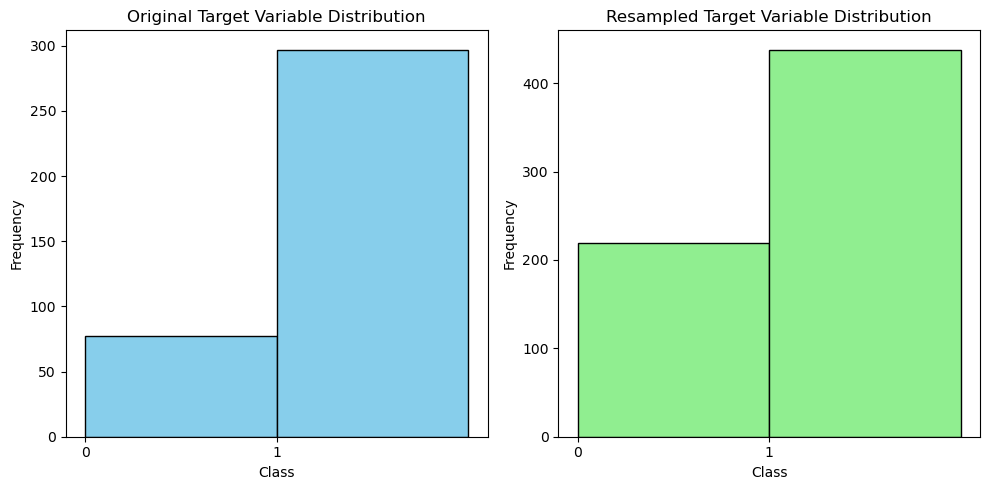

In [39]:
import matplotlib.pyplot as plt

# Assuming y_resampled is your resampled target variable
# Plot the distribution of the target variable before and after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Target Variable Distribution')
plt.hist(y, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Assuming binary classification

plt.subplot(1, 2, 2)
plt.title('Resampled Target Variable Distribution')
plt.hist(y_resampled, bins=2, color='lightgreen', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Assuming binary classification

plt.tight_layout()
plt.show()


In [40]:
df2.shape

(374, 16)

In [41]:
encoded_df.shape

(374, 12)

In [42]:
print(X_resampled)

     Gender_encoded  Age  Occupation_encoded  Sleep Duration  \
0                 1   27                   9             6.1   
1                 1   28                   1             6.2   
2                 1   28                   1             6.2   
3                 1   28                   6             5.9   
4                 1   28                   6             5.9   
..              ...  ...                 ...             ...   
652               0   50                   5             6.0   
653               0   57                   5             8.2   
654               0   50                   5             6.1   
655               0   50                   5             6.0   
656               0   58                   5             8.0   

     Physical Activity Level  Stress Level  BMI_category_encoded  Heart Rate  \
0                         42             6                   0.0          77   
1                         60             8                   1.0       

In [43]:
type(X_resampled)

pandas.core.frame.DataFrame

In [44]:
X_resampled.shape

(657, 11)

In [45]:
y_resampled.shape

(657,)

In [46]:
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [47]:
resampled_data.columns = list(X.columns) + ['Sleep_Disorder_encoded']

In [48]:
resampled_data.columns

Index(['Gender_encoded', 'Age', 'Occupation_encoded', 'Sleep Duration',
       'Physical Activity Level', 'Stress Level', 'BMI_category_encoded',
       'Heart Rate', 'Daily Steps', 'systolic_pressure', 'diastolic_pressure',
       'Sleep_Disorder_encoded'],
      dtype='object')

In [49]:
resampled_data.shape

(657, 12)

In [50]:
resampled_data.head

<bound method NDFrame.head of      Gender_encoded  Age  Occupation_encoded  Sleep Duration  \
0                 1   27                   9             6.1   
1                 1   28                   1             6.2   
2                 1   28                   1             6.2   
3                 1   28                   6             5.9   
4                 1   28                   6             5.9   
..              ...  ...                 ...             ...   
652               0   50                   5             6.0   
653               0   57                   5             8.2   
654               0   50                   5             6.1   
655               0   50                   5             6.0   
656               0   58                   5             8.0   

     Physical Activity Level  Stress Level  BMI_category_encoded  Heart Rate  \
0                         42             6                   0.0          77   
1                         60             

In [51]:
resampled_data.isna().sum()

Gender_encoded             0
Age                        0
Occupation_encoded         0
Sleep Duration             0
Physical Activity Level    0
Stress Level               0
BMI_category_encoded       0
Heart Rate                 0
Daily Steps                0
systolic_pressure          0
diastolic_pressure         0
Sleep_Disorder_encoded     0
dtype: int64

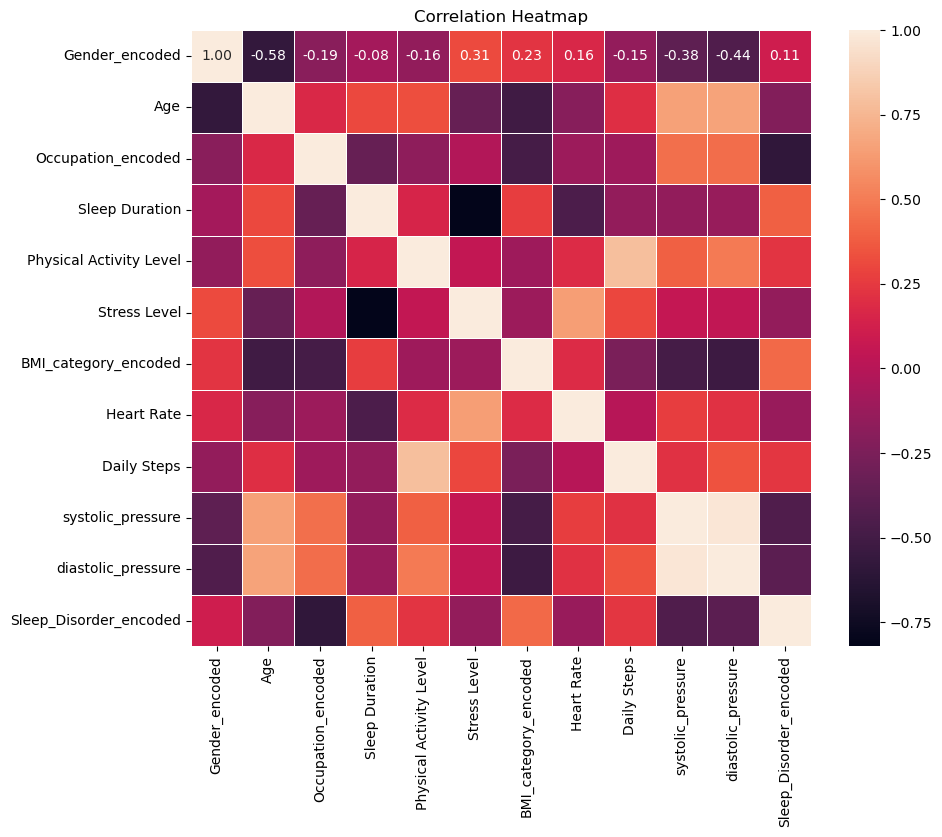

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = resampled_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

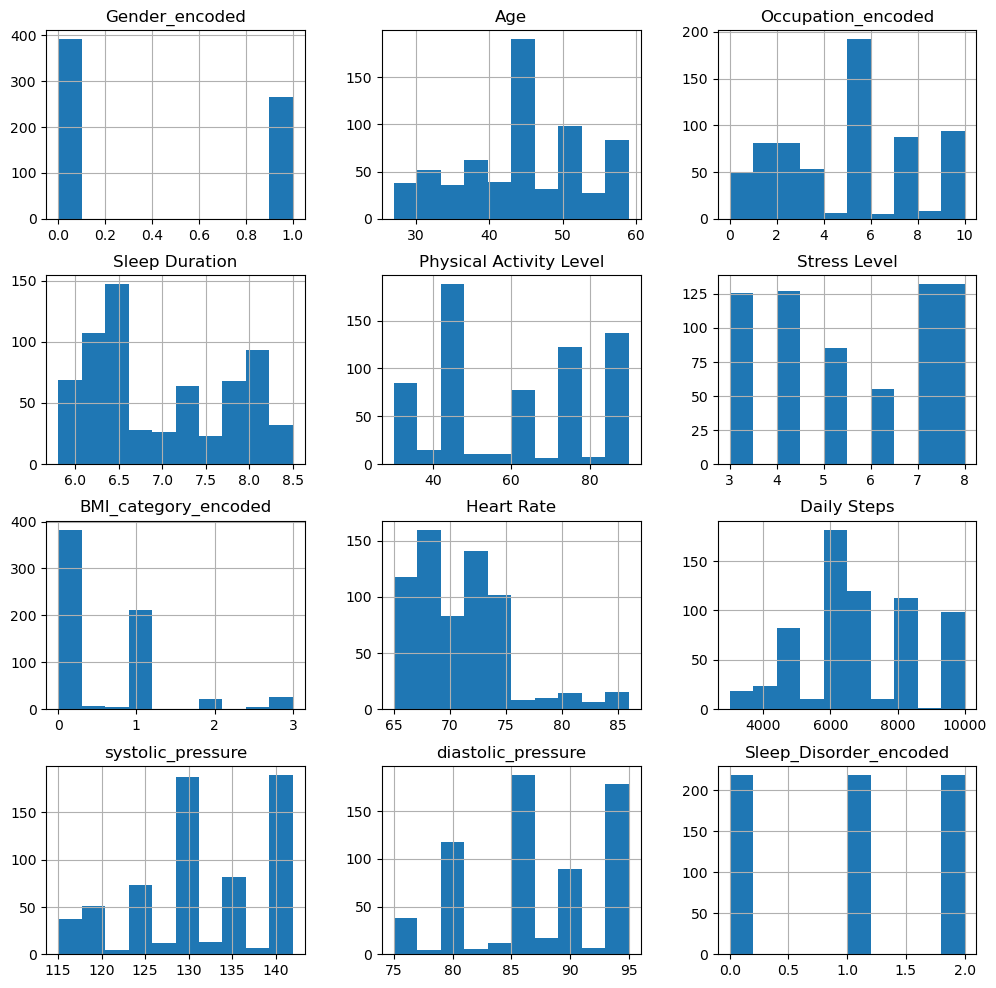

In [53]:
resampled_data.hist(figsize = (12, 12))
plt.show()

C:\Users\adity\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


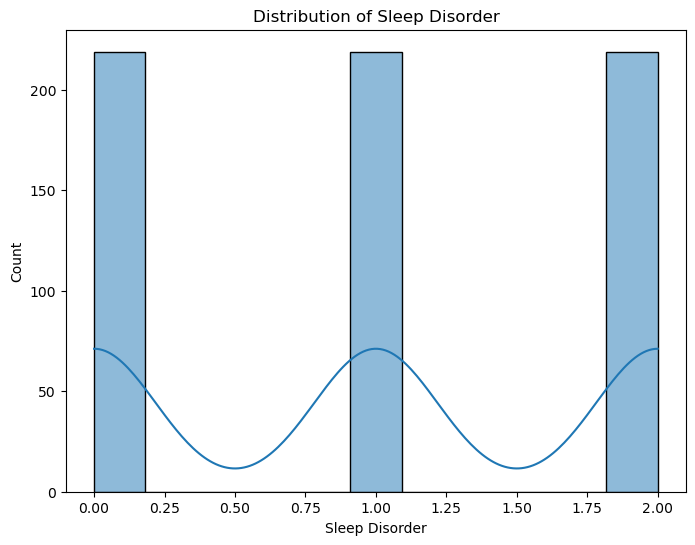

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(resampled_data['Sleep_Disorder_encoded'], kde=True)
plt.title(f'Distribution of {"Sleep Disorder"}')
plt.xlabel("Sleep Disorder")
plt.show()

In [55]:
resampled_data.to_csv('sleep_disorder.csv',index=False)

### split data into training testing 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Rain forest model 

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.96      0.90      0.93        51
           2       0.91      0.96      0.93        52

    accuracy                           0.92       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132



### SVM Classification 

In [62]:
from sklearn.svm import SVC

In [63]:
svm_classifier = SVC(kernel='linear')

In [64]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [77]:
y_pred = svm_classifier.predict(X_test)

In [78]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.96      0.84      0.90        51
           2       0.87      0.90      0.89        52

    accuracy                           0.87       132
   macro avg       0.86      0.87      0.86       132
weighted avg       0.88      0.87      0.87       132



In [79]:
accuracy_score(y_test,y_pred)

0.8712121212121212

In [80]:
#Neural Network


In [81]:
from sklearn.neural_network import MLPClassifier

nn_class = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_class.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [82]:
nn_pred = nn_class.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, nn_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4015151515151515


In [87]:
print("Classification Report:")
print(classification_report(y_test, nn_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46        29
           1       0.69      0.47      0.56        51
           2       0.00      0.00      0.00        52

    accuracy                           0.40       132
   macro avg       0.33      0.49      0.34       132
weighted avg       0.33      0.40      0.32       132



In [87]:
import pickle
with open('svm_sleep.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(svm_classifier, f)

In [88]:
with open('rf_sleep.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(rf_model, f)

In [93]:
with open('nn_sleep.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(nn_class, f)

In [88]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[("rf",rf_model),("svm",svm_classifier),("nn",nn_class)], voting = "hard")
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(kernel='linear')),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42))])

In [89]:
en_pred = ensemble.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, en_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8787878787878788


In [94]:
with open('ensemble_sleep.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(ensemble, f)

In [95]:
# to load pickle

# with open(path, 'rb') as f:
#     # Load the object from the file
#     ensem = pickle.load(f)

In [101]:
ensemble2 = VotingClassifier(estimators=[("rf",rf_model),("svm",svm_classifier)], voting = "hard")
ensemble2.fit(X_train, y_train)

#if hard voting, 87%

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(kernel='linear'))])

In [102]:
en2_pred = ensemble2.predict(X_test)

accuracy = accuracy_score(y_test, en_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8787878787878788
